# Installing important packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None


In [2]:
path = "G:\Capstone_Pr\Supply Chain Management\SCMS_Delivery_History_Dataset_20150929.csv"

dtype_mapper = {
    "Scheduled Delivery Date": "datetime64[ns]",
    "Delivered to Client Date": "datetime64[ns]"
}


## Reading of dataset and basic overview of the dataset of supply_chain_management

In [3]:
def load_dataset(path):
    df = pd.read_csv(path)
    return df

def rectify_datatypes(df, dtype_mapper):
    for column, dtype in dtype_mapper.items():
        df[column] = df[column].astype(dtype)
    return df

def late_shipments(df):
    df["Late Delivery"] = df.apply(lambda x: 1 if (x["Scheduled Delivery Date"]-x["Delivered to Client Date"]).days<0 else 0, axis=1)
    return df

def products_with_less_weight_than_average(df):
    df["Weight (Kilograms)"] = pd.to_numeric(df["Weight (Kilograms)"], errors="coerce")
    avg_weight_dict = {prod: df[df["Product Group"]==prod]["Weight (Kilograms)"].mean() for prod in df["Product Group"].unique()}
    df["Less Product Weight than Avg"] = df.apply(lambda x: 1 if x["Weight (Kilograms)"]<avg_weight_dict[x["Product Group"]] else 0, axis=1)
    print(avg_weight_dict)
    return df

def execute_preprocessing():
    df = load_dataset(path)
    df = rectify_datatypes(df, dtype_mapper)
    df = late_shipments(df)
    df = products_with_less_weight_than_average(df)
    return df

data = execute_preprocessing()
data.shape

{'HRDT': 2092.443718228032, 'ARV': 3813.9094210207786, 'ACT': 946.4615384615385, 'MRDT': 36.833333333333336, 'ANTM': 1114.2631578947369}


(10324, 35)

In [9]:
data.shape

(10324, 35)

# Performing the basic EDA

In [6]:
#checking the datatype of all the columns in the dataset

data.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


### converting data type object to date_time

In [7]:
data["Scheduled Delivery Date"]=pd.to_datetime(data["Scheduled Delivery Date"])
data["Delivered to Client Date"]=pd.to_datetime(data["Delivered to Client Date"])
data["Delivery Recorded Date"]=pd.to_datetime(data["Delivery Recorded Date"])

In [9]:
# again checking the datatype of columns
data.dtypes

ID                                       int64
Project Code                            object
PQ #                                    object
PO / SO #                               object
ASN/DN #                                object
Country                                 object
Managed By                              object
Fulfill Via                             object
Vendor INCO Term                        object
Shipment Mode                           object
PQ First Sent to Client Date            object
PO Sent to Vendor Date                  object
Scheduled Delivery Date         datetime64[ns]
Delivered to Client Date        datetime64[ns]
Delivery Recorded Date          datetime64[ns]
Product Group                           object
Sub Classification                      object
Vendor                                  object
Item Description                        object
Molecule/Test Type                      object
Brand                                   object
Dosage       

# 1.A Boxplot – All Numeric Variables

<AxesSubplot:xlabel='Unit of Measure (Per Pack)'>

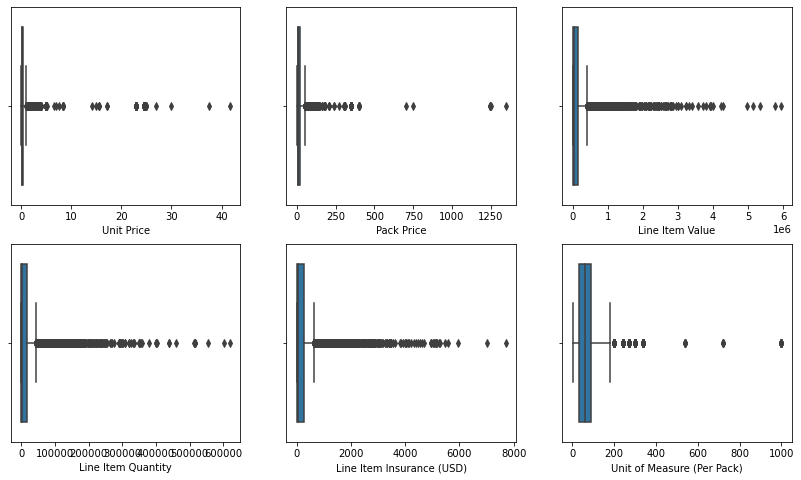

In [18]:

fig,axes=plt.subplots(2,3,figsize=(14,8))
sns.boxplot(x="Unit Price",data=df,ax=axes[0,0])
sns.boxplot(x="Pack Price",data=df,ax=axes[0,1])
sns.boxplot(x="Line Item Value",data=df,ax=axes[0,2])
sns.boxplot(x="Line Item Quantity",data=df,ax=axes[1,0])
sns.boxplot(x="Line Item Insurance (USD)",data=df,ax=axes[1,1])
sns.boxplot(x="Unit of Measure (Per Pack)",data=df,ax=axes[1,2])

In [19]:
numric_col=df[["Pack Price","Unit Price","Weight (Kilograms)","Line Item Insurance (USD)","Line Item Value"]]

# b. Histogram – All Numeric Variables

<AxesSubplot:xlabel='Unit of Measure (Per Pack)', ylabel='Count'>

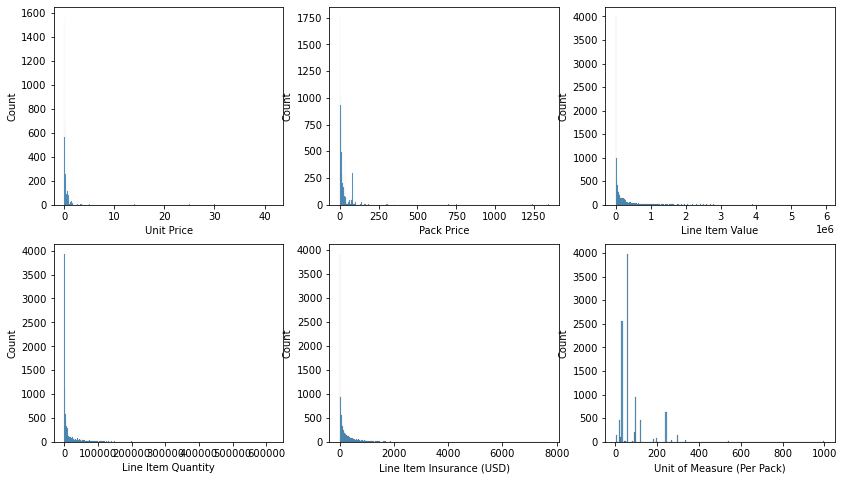

In [20]:
fig,axes=plt.subplots(2,3,figsize=(14,8))
sns.histplot(df["Unit Price"],ax=axes[0,0])
sns.histplot(df["Pack Price"],ax=axes[0,1])
sns.histplot(df["Line Item Value"],ax=axes[0,2])
sns.histplot(df["Line Item Quantity"],ax=axes[1,0])
sns.histplot(df["Line Item Insurance (USD)"],ax=axes[1,1])
sns.histplot(df["Unit of Measure (Per Pack)"],ax=axes[1,2])

# c. Distribution Plot – All Numeric Variables 


<AxesSubplot:xlabel='Unit of Measure (Per Pack)', ylabel='Density'>

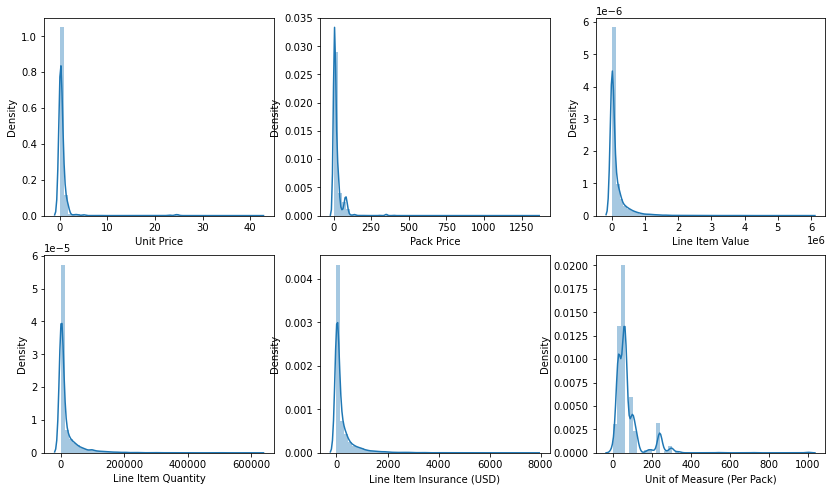

In [21]:
fig,axes=plt.subplots(2,3,figsize=(14,8))
sns.distplot(df["Unit Price"],ax=axes[0,0])
sns.distplot(df["Pack Price"],ax=axes[0,1])
sns.distplot(df["Line Item Value"],ax=axes[0,2])
sns.distplot(df["Line Item Quantity"],ax=axes[1,0])
sns.distplot(df["Line Item Insurance (USD)"],ax=axes[1,1])
sns.distplot(df["Unit of Measure (Per Pack)"],ax=axes[1,2])

# d. Aggregation for all numerical Columns 

In [4]:
data.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Line Item Insurance (USD),Late Delivery,Less Product Weight than Avg
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,6372.000000,10037.000000,10324.000000,10324.00000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,3424.441306,240.117626,0.114878,0.46048
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,13526.968270,500.190568,0.318890,0.49846
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,206.750000,6.510000,0.000000,0.00000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,1047.000000,47.040000,0.000000,0.00000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,3334.000000,252.400000,0.000000,1.00000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,857354.000000,7708.440000,1.000000,1.00000


# f. Duplicate values across all columns 

In [62]:
duplicate = df[df.duplicated()]

In [63]:
duplicate
## There is no duplicate value across all the columns

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),late_date


# g. Regression Plot - All Numeric Variables 


In [71]:
df.head(1)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),late_date
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,C�te d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2006-06-02,2006-06-02,2006-06-02,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,1,Test kit,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,Yes,13.0,780.34,NaN,0 days


<AxesSubplot:xlabel='Unit Price', ylabel='Pack Price'>

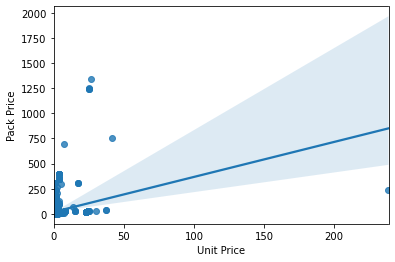

In [5]:
sns.regplot(x="Unit Price",y="Pack Price",data=data)


# i. Bar Plot – Every Categorical Variable vs every Numerical Variable 


<AxesSubplot:xlabel='Unit of Measure (Per Pack)', ylabel='Product Group'>

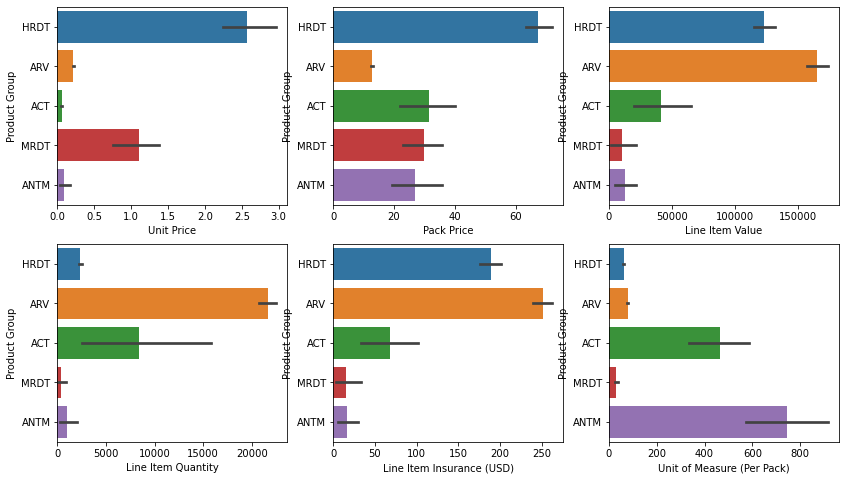

In [6]:
fig,axes=plt.subplots(2,3,figsize=(14,8))
sns.barplot(data["Unit Price"],data["Product Group"],ax=axes[0,0])
sns.barplot(data["Pack Price"],data["Product Group"],ax=axes[0,1])
sns.barplot(data["Line Item Value"],data["Product Group"],ax=axes[0,2])
sns.barplot(data["Line Item Quantity"],data["Product Group"],ax=axes[1,0])
sns.barplot(data["Line Item Insurance (USD)"],data["Product Group"],ax=axes[1,1])
sns.barplot(data["Unit of Measure (Per Pack)"],data["Product Group"],ax=axes[1,2])

# j. Pair plot - All Numeric Variables 

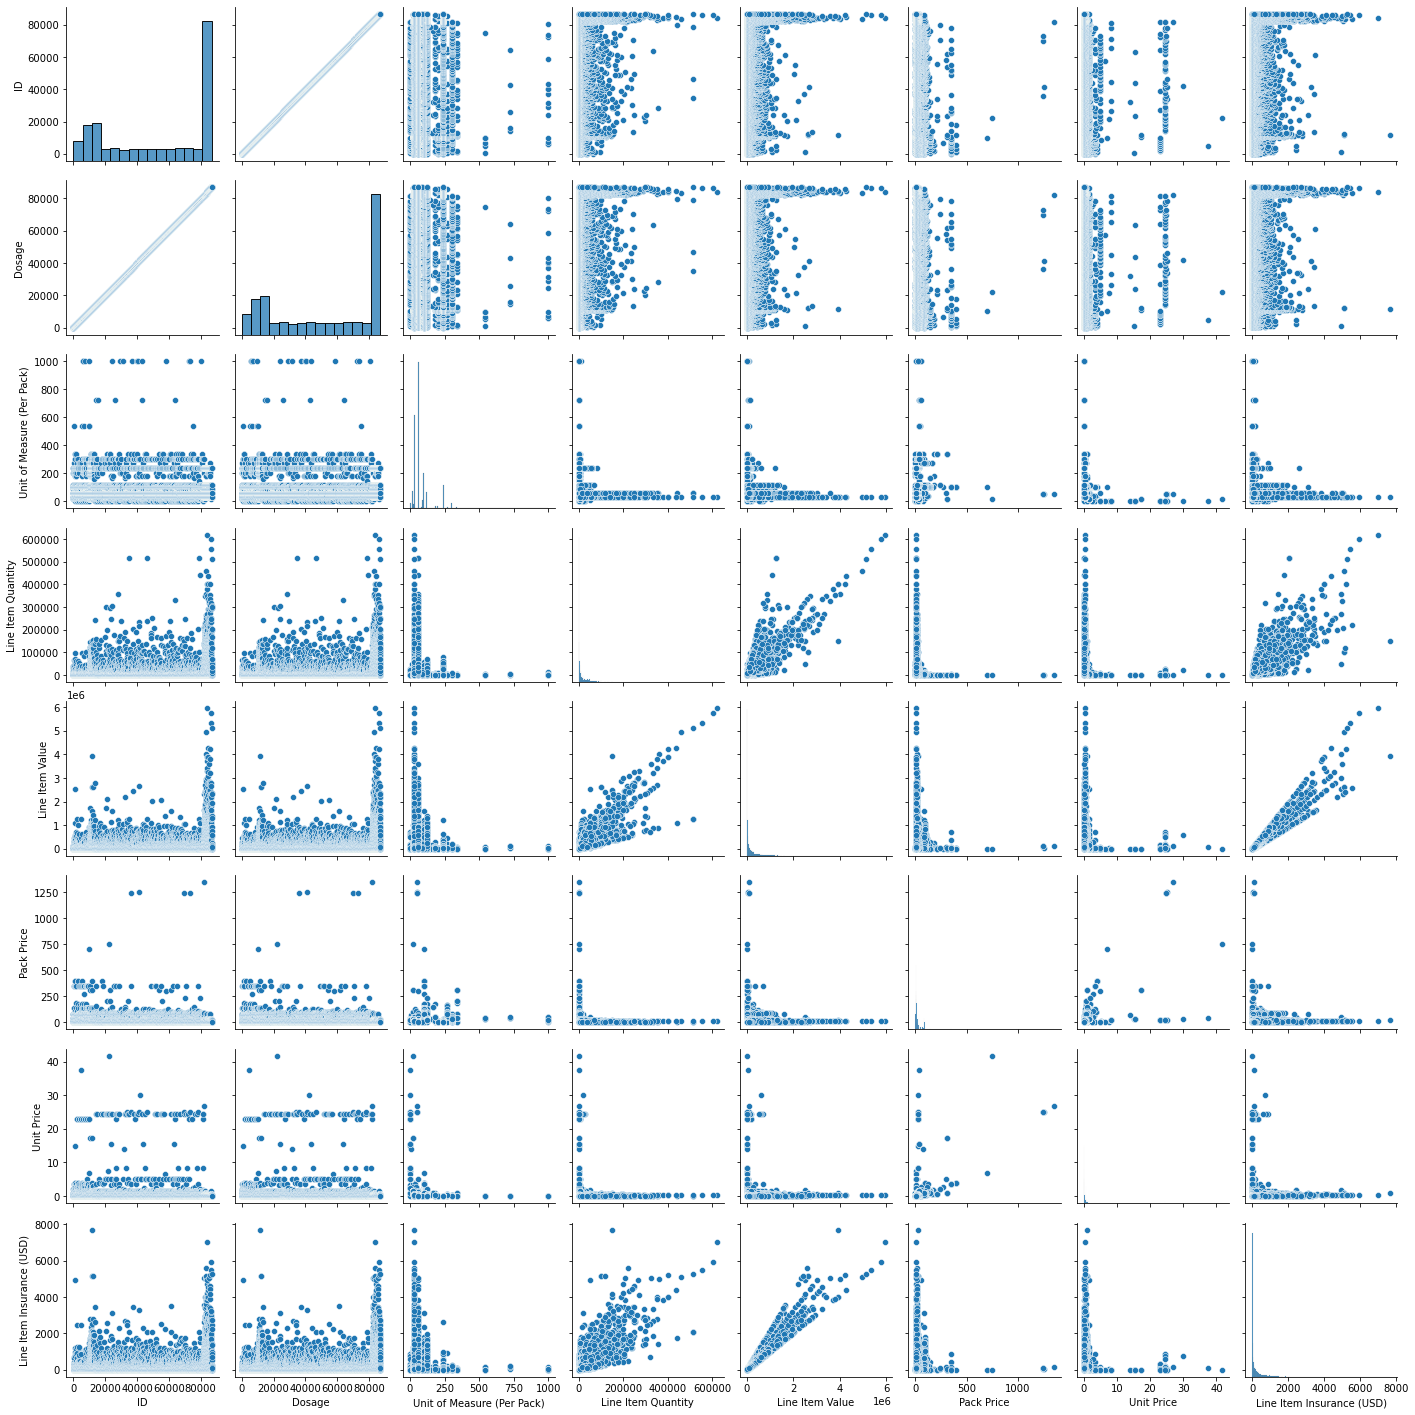

In [24]:
sns.pairplot(data)

# Best fulfilment agencies 

In [37]:
len(pd.unique(df["Fulfill Via"]))
# there is 2 fullfilment agencies

2

In [38]:
df[["Fulfill Via","Shipment Mode"]].groupby(by="Fulfill Via").count().sort_values(by="Shipment Mode",ascending=False)
# The best Fullfilment Agencies is From RDC


,Shipment Mode
Fulfill Via,
From RDC,5092
Direct Drop,4872


# 3. Top 5 Countries from which most of the goods are manufactured

In [39]:
## The following 5 countries from where most of the good are manufactured.
df[["Country","Manufacturing Site"]].groupby(by="Country").count().sort_values(by="Manufacturing Site",ascending=False).head(5)

,Manufacturing Site
Country,
South Africa,1364
Nigeria,1158
C�te d'Ivoire,970
Uganda,771
Vietnam,688


In [40]:
df["Weight (Kilograms)"]=pd.to_numeric(df["Weight (Kilograms)"],errors="coerce")

# 4. Top 10 Product groups that are shipped the most

In [41]:
len(pd.unique(df["Product Group"]))

5

In [42]:
## The Product groups that are shipped the most
df[["Product Group","Delivered to Client Date"]].groupby(by="Product Group").count().sort_values(by="Delivered to Client Date",ascending=False)

,Delivered to Client Date
Product Group,
ARV,8241
HRDT,1678
ANTM,22
ACT,16
MRDT,7


# 5. Which product groups are often delivered late? 

In [11]:
pd.pivot_table(
    data = data,
    index = "Product Group",
    values = "Late Delivery",
    aggfunc = "sum"
).sort_values("Late Delivery", ascending=False)

,Late Delivery
Product Group,
ARV,1073
HRDT,113
ACT,0
ANTM,0
MRDT,0


# 6. Average Freight cost across all product groups

In [45]:
## for that we should convert it to numeric type

df["Freight Cost (USD)"]=pd.to_numeric(df["Freight Cost (USD)"],errors="coerce")

In [46]:
## the result of the average freight cost across all product groups are as folows.

df[["Freight Cost (USD)","Product Group"]].groupby(by="Product Group").mean().sort_values(by="Freight Cost (USD)",ascending=False)

,Freight Cost (USD)
Product Group,
HRDT,13080.630742
ARV,10766.160167
ACT,8759.196154
ANTM,7929.770526
MRDT,1628.520000


# 8. Vendors with maximum products shipped 

In [48]:

data[["Vendor","Scheduled Delivery Date"]].groupby(by="Vendor").count().sort_values(by="Scheduled Delivery Date",ascending=False)

# vendor scms from rdc  had maximum product shipped across all the vendors

,Scheduled Delivery Date
Vendor,
SCMS from RDC,5092
"Orgenics, Ltd",754
S. BUYS WHOLESALER,707
Aurobindo Pharma Limited,668
"Trinity Biotech, Plc",356
...,...
PLURIPHARM S.A.,1
CENTRAL PHARMACEUTICAL COMPANY NO. 1,1
OMEGA DIAGNOSTICS LTD,1


# 9. Average weight of products.

In [49]:
data.head(1)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),late_date
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,C�te d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2006-06-02,2006-06-02,2006-06-02,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,1,Test kit,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,Yes,13.0,780.34,NaN,0 days


In [7]:
data["Weight (Kilograms)"].mean()
## The average weight of products is 3479.

3424.441305712492

# 10. Which shipment mode contributes more to the overall shipment? 


In [52]:
df[["Shipment Mode","PO Sent to Vendor Date"]].groupby(by="Shipment Mode").count().sort_values(by="PO Sent to Vendor Date",ascending=False).head(1)
## Air shipment mode contribute more to overall shipment

,PO Sent to Vendor Date
Shipment Mode,
Air,6113


# 12. What are the brands that don’t have line item insurance? If any, specify the first 10 of them

In [55]:
df[["Line Item Insurance (USD)","Brand"]].groupby(by="Brand").sum().sort_values(by="Line Item Insurance (USD)",ascending=True).head(1)
# only one have no line item insurance i.e brand Visitect

,Line Item Insurance (USD)
Brand,
Visitect,0.0


# 13. Brands that sell products weighing lesser than the average weight of products. 


In [12]:

pd.pivot_table(
    data = data,
    index = "Brand",
    values = "Less Product Weight than Avg",
    aggfunc = "sum"
).sort_values("Less Product Weight than Avg", ascending=False)

,Less Product Weight than Avg
Brand,
Generic,3000
Determine,546
Uni-Gold,248
Aluvia,155
Kaletra,94
Stat-Pak,87
Norvir,83
Bioline,63
Truvada,56
